In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(<Axes: >, <matplotlib.image.AxesImage at 0x1fa4ce37580>)

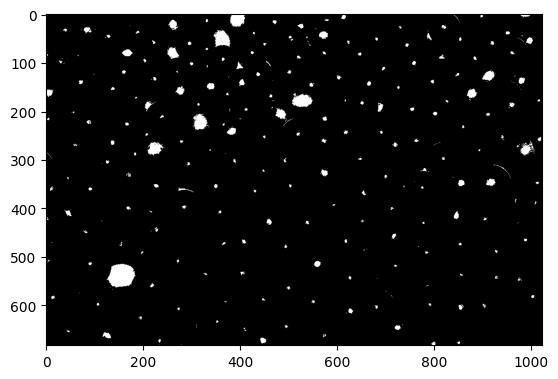

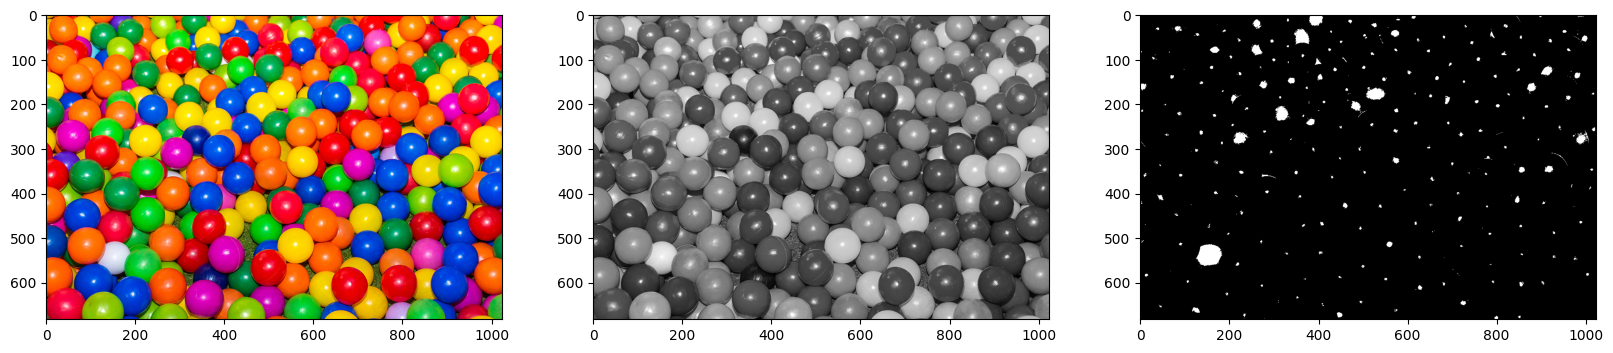

In [17]:
img = cv2.imread("ballpit.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Plot the grayscale image
plt.imshow(gray, cmap='gray')

# Apply cutoff threshold
ret, thresh = cv2.threshold(gray, 210, 255, cv2.THRESH_BINARY)

# Plot the thresholded image
plt.imshow(thresh, cmap='gray')

# Plot all three images side by side
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(gray, cmap='gray')
plt.subplot(133), plt.imshow(thresh, cmap='gray')


(683, 1024)


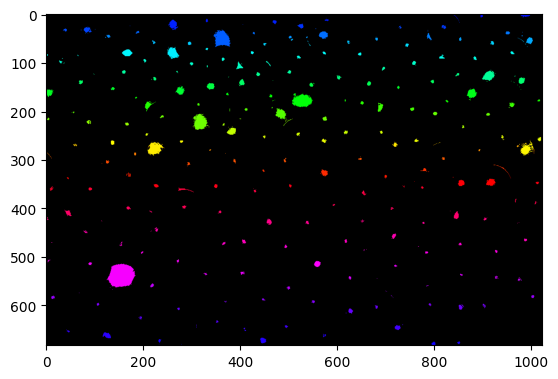

Number of connected components is:  397


In [26]:
# Find connected components
ret, labels = cv2.connectedComponents(thresh)

print(labels.shape)

# Assign random colors to each component
#colors = []
#for n in range(ret):
#    colors.append((255*np.random.rand(3)).astype(np.uint8))

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
img[label_hue==0] = 0

# Show labeled image
plt.imshow(img)
plt.show()

# Print number of objects found
print("Number of connected components is: ", ret-1)